# Back Bay National Wildlife Refuge


> Back Bay National Wildlife Refuge is located in the southeastern corner of the City of Virginia Beach. The refuge was established in 1938 to protect and provide habitat for migrating and wintering waterfowl. Diverse habitats, including beachfront, freshwater marsh, dunes, shrub-scrub and upland forest are home to hundreds of species of birds, reptiles, amphibians, mammals and fish.

![BNWR](https://www.fws.gov/sites/default/files/styles/banner_image_xl/public/banner_images/2020-09/waterfowl%20%28tundras%29.jpg?h=0c8d0f81&itok=NcZlpD27)


To get introduced to the park and its history, please view the following interactive story map.

[BBNWR History and Introduction](https://storymaps.arcgis.com/stories/960d9db38cca4f3d8d38111119b9874f)

Additionally, here is some drone footage of the park for a better look at the geography and ecology of the area.

[BBNWR Drone Footage](https://www.youtube.com/watch?v=NlW330aBTCc)


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
bbnwr = pd.read_csv("./BKB_WaterQualityData_2020084.csv")

## Getting to know the data

How many different `Site_Id` values are there and how many observations per site?

<details>
    
`bbnwr["Site_Id"].value_counts()`
    
</details>

You will see that one observation was miscoded as "d" instead of "D". Use the [replace](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html) method to change "d" to "D". Make sure to save the results back to the "Site_Id" column and verify your results by showing the number of observations per "Site_Id".

<details>

`bbnwr["Site_Id"] = bbnwr["Site_Id"].replace("d", "D")`
`bbnwr["Site_Id"].value_counts()`

</details>

Create a box plot of "Dissolved Oxygen (mg/L)" broken out by "Site_Id". Feel free to set `showfliers = False`. Which site typically has the highest dissolved oxygen?

<details>

`sb.boxplot(data = bbnwr, x = "Site_Id", y = "Dissolved Oxygen (mg/L)", showfliers = False)`

</details>

Make a scatter plot of "AirTemp (C)" and "Dissolved Oxygen (mg/L)". What do you notice about this plot that might suggest a problem with the data?

<details>
    
`sb.scatterplot(data = bbnwr, x = "AirTemp (C)", y = "Dissolved Oxygen (mg/L)")`
    
    
</details>

## Simulating the sampling distribution of the sample mean

Below is a plot of the Dissolved Oxygen variable. We can see that this distribution looks approximately bell-shaped (normal/Gaussian) already, with no strong left or right skew.

<Axes: xlabel='Dissolved Oxygen (mg/L)', ylabel='Density'>

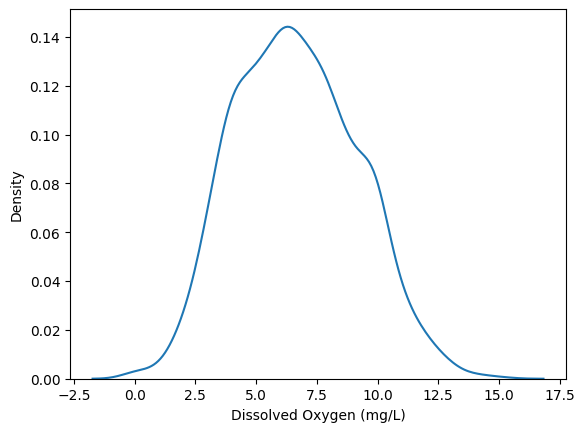

In [3]:
sb.kdeplot(bbnwr["Dissolved Oxygen (mg/L)"])

Suppose we did not get to see all of these measurements, but only a sample of size 20. We want to estimate the average dissolved oxygen level. How well does the sample do at estimating this **parameter**.

First, pull out the "Dissolved Oxygen (mg/L)" column and remove any missing values. Call this `dissox`.

<details>

`dissox = bbnwr["Dissolved Oxygen (mg/L)"].dropna()`

</details>

`dissox` will play the role of the population in this simulation.

Use the `sample` method to draw 20 observations from the population using a simple random sample and compute the sample mean of these values.

<details>

`dissox.sample(20).mean()`

</details>

If we drew another sample, would you expect to see the same sample mean value? Find out.

<details>

`dissox.sample(20).mean()`

</details>

Take a moment to write down what you are seeing. Why are these values not the same?

Now repeat this process using a list comprehension to repeat the sampling 100,000 times. (Hint: the end of the comprehension should include `for _ in range(0, 100000)`).

<details>

```
sample_means = [dissox.sample(20).mean() for _ in range(0,100000)]
sample_means = pd.Series(sample_means)
```

</details>

What is the mean of the sample means?

<details>

`sample_means.mean()`

</details>

What is the standard error? (Recall, a standard error is the standard deviation of a sampling distribution.)

<details>

`sample_means.std()`

</details>

Now, compute the mean and standard deviation of dissolved oxygen for the population (`bbnwr["Dissolved Oxygen (mg/L)"]`). How do they relate to what you computed from the sampling distribution of the sample means?

<details>

```
ex = bbnwr["Dissolved Oxygen (mg/L)"].mean()
stdx = bbnwr["Dissolved Oxygen (mg/L)"].std()
(round(ex, 3), round(stdx, 3), round(stdx / np.sqrt(20), 4))
```

</details>

Repeat the simulation for a sample size of 100. What do you see?

<details>

```
sample_means_100 = [dissox.sample(100).mean() for _ in range(0,100000)]
sample_means_100 = pd.Series(sample_means_100)
(sample_means_100.mean(), sample_means_100.std())
```

</details>

Plot (using a KDE plot) the distribution of the sample means for samples of 20 and the distribution of the sample means for samples of size 100. What do you see? (Look carefully at the scale of the x-axis)

<details>

```
sb.kdeplot(x = sample_means)
sb.kdeplot(x = sample_means_100)
```

</details>

For the sample means of samples of size 100, what proportion are less than one, two, and three standard errors from the mean of the distribution?

<details>
    
```
sem = stdx / np.sqrt(100)
dists_100 = (sample_means_100 - ex).abs()
((dists_100 < 1 * sem ).mean(),
 (dists_100 < 2 * sem).mean(),
 (dists_100 < 3 * sem).mean())
```
               
</details>

What is the name of the theorem that states that we should see the sample mean have an approximately Gaussian distribution in large samples? What is the name of the rule that gives particular percentages for the probability of being within 1, 2, or 3 standard errors for the sample mean?

## Sampling Distributions for Other Statistics

We have been focusing on *sample means*, but other statistics also have *sampling distributions*.

The most immediate extension is the sampling distribution for the **difference of sample means**.

Let's create a new column "bay" for `bbnwr` that indicates if the `Site_Id` is equal to `Bay` and false otherwise.


In [4]:
bbnwr["bay"] = bbnwr["Site_Id"] == "Bay"
bbnwr["bay"].mean()

dissox_bay = bbnwr.dropna(subset = ["bay", "Dissolved Oxygen (mg/L)"])

Write a function `diff_mean_dissox` that will take a table and compute the difference for "Dissolved Oxygen (mg/L)" for the Bay and non-Bay entries. Run it on the entire `dissox_bay` "population" see what the population difference of means is.


<details>

```
def diff_mean_dissox(tbl):
  means = tbl.groupby("bay")["Dissolved Oxygen (mg/L)"].mean()
  return means[True] - means[False]

diff_mean_dissox(dissox_bay)
```

</details>

If we need to get specific numbers of samples of each type of measurement, say for example 20 measurements from the bay and 20 from the other locations, we can combine `groupby` with `sample`:

In [5]:
samples_20_each = dissox_bay.groupby("bay").sample(20)

samples_20_each.groupby("bay")["Dissolved Oxygen (mg/L)"].mean()

bay
False    5.710
True     7.685
Name: Dissolved Oxygen (mg/L), dtype: float64

Create a simulation that takes 5000 samples of size 20 from both the bay and non-bay sites and computes the difference of means for dissolved oxygen.

Plot the results using a KDE plot.


<details>

```
diff_mean_samples = pd.Series([diff_mean_dissox(dissox_bay.groupby("bay").sample(20, replace = True)) for _ in range(0, 5000)])
sb.kdeplot(x = diff_mean_samples)
```

</details>

What is the average value for this difference of means statistic across the many samples? Was it close to the population difference of means?

<details>

```
diff_mean_samples.mean()
```

</details>

What is the standard deviation of this set of difference of sample means?

<details>

```
diff_mean_samples.std()
```

</details>

This value is very close to, but not identical to, our pooled standard deviation calculation we used when creating effect sizes.

Calculate the following and compare to the value got as the standard deviation of the sampling distribution of the sample mean.

$$\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}$$

Where $\sigma_1^2$ is the variance of the bay sites and $n_1$ is the number of Bay sites sampled. Likewise subscript 2 indicates the non-bay sites.



<details>

```
g = bbnwr.groupby("bay")["Dissolved Oxygen (mg/L)"]
vars = g.var() ; print(vars)
np.sqrt((vars / 20).sum())
```

</details>

Let's do something similar for correlation. Here we restict rows in the table with observed dissolved oxygen and pH and demonstrate another to compute correlaiton for two variables.

In [6]:
dissox_ph = bbnwr.dropna(subset = ["Dissolved Oxygen (mg/L)", "pH (standard units)"])
dissox_ph["Dissolved Oxygen (mg/L)"].corr(dissox_ph["pH (standard units)"])

np.float64(0.055908571056157146)

Create a function that takes a table and computes the correlation of dissolved oxygen and pH.


<details>

```
def dissox_ph_corr(tbl):
  return tbl["Dissolved Oxygen (mg/L)"].corr(tbl["pH (standard units)"])

dissox_ph_corr(dissox_ph)
```

</details>

Create a simulation using 1000 samples of size 20 and compute the correlation of dissolved oxygen and pH.


<details>

```
corrs = pd.Series([dissox_ph_corr(dissox_ph.sample(20)) for _ in range(0, 1000)])
sb.kdeplot(x = corrs)
```
</details>

Compute the average correlation and the standard deviation of the correlations.

<details>

```
(corrs.mean(), corrs.std())
```

</details>


There a few different ways to approximate the standard deviation of the correletion coefficient, we will use the approximation:

$$\frac{1}{\sqrt{n}}$$

For $n=20$, compute this value and compare it to what we found in the simulation.


<details>

```
1/np.sqrt(20)
```

</details>


As we can see in the plot, the distribution of the correlation coefficient is close to Gaussian when the true correlation is close to zero. This approximation breaks down as the population approaches 1 or -1.

The quality of the Gaussian approximation can vary for things like the sample mean as well, as we will explore in the next section.

# Scooters Simulations and the Central Limit Theorem

> In many cities around the world, micromobility in the form of
electric scooters has recently become very popular.  The city of
Austin, Texas has made available trip-level data from all scooter
companies operating within the city limits.

> This dataset is a subset of the complete Austin e-mobility dataset. A row here is a single trip on a rented scooter.

In [7]:
scooters = pd.read_csv("./scooters_tiny.csv.gz")

In lecture, we learned that the central limit theorem (CLT) states that, in large samples, the **sampling distribution of the sample means of IID $X$ with $\text{E}(X) = \mu$ and $\text{Var}(X) = \sigma^2$ will converge to a standard normal (Gaussian) distribution**.

Above, we observed the behavior of the central limit theorem in a variable that was approximately Gaussian already. However, this theorem holds even if the original variables themselves are not normally distributed. We will conduct simulations using the scooters data to observe this fact.



The Trip Duration variable in the scooters dataset represents the scooter trip duration in seconds. Because there are many more short trips, with few extremely long trips, this data is extremely right skewed. This is represented in the KDE plot below.

<Axes: xlabel='Trip Duration', ylabel='Density'>

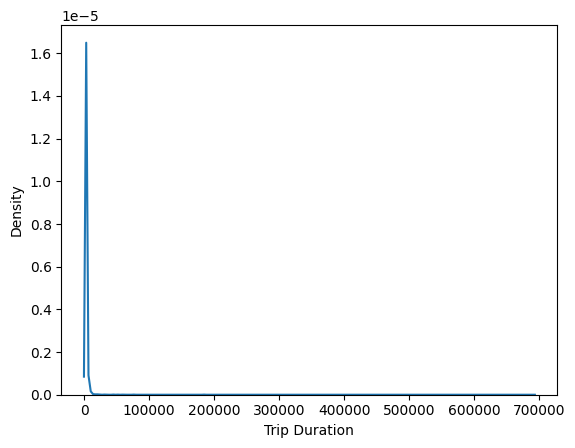

In [8]:
sb.kdeplot(scooters['Trip Duration'])

Compute the coefficient of skew for 'Trip Duration' using the .skew() method

<details>

```
scooters['Trip Duration'].skew()
```

</details>

As we have done in previous labs and homeworks, we will attempt to correct for the skew using a **transformation**. Because Trip Duration has mostly **positive, right skewed data**, we can observe the effects of the

* reciprocal transformation: $1/X$
* square root transformation: $\sqrt{X}$
* logarithm transformation: $\log(X)$

A very small number of the trip duration values are equal to 0. To use these transformations, we will need to change these values to be 1, as the reciprocal and log transformations will not work on values that are 0. Run the line of code given below to replace these values.


In [9]:
# this line of code replaces Trip Duration values less than 1 with 1, which is necessary for the transformations below
scooters['Trip Duration'] = scooters['Trip Duration'].apply(lambda x: 1 if x < 1 else x)


Implement these three transformations for `Trip Duration` and compute the coefficient of skew using the .skew() method.

<details>

```
scooters["duration_recip"] = 1 / scooters["Trip Duration"]
scooters["duration_sqrt"] = np.sqrt(scooters["Trip Duration"])
scooters["duration_log"] = np.log(scooters["Trip Duration"])

scooters[["Trip Duration", "duration_recip", "duration_sqrt", "duration_log"]].skew()
```

</details>

Which transformation minimizes skew? Select that transformation and use it for the following tasks.

Now use a list comprehension like in the section above to repeatedly sample 5 trip durations from the dataset 100 times. Do this for both the original Trip Duration data, and the transformed trip duration data. (Hint: the end of the comprehension should include `for _ in range(0, 100)`).

<details>

```
duration_sample_means5 = [scooters['Trip Duration'].sample(5).mean() for _ in range(0,100)]
log_duration_sample_means5 = [scooters['duration_log'].sample(5).mean() for _ in range(0,100)]
```

</details>

Plot the sampling distribution of the sample means using a KDE plot for both the original and transformed data.

<details>

```
sb.kdeplot(x = duration_sample_means5)
sb.kdeplot(x = log_duration_sample_means5)
```

</details>

Although the distributions produced will vary due to randomness in the sampling, we can make general observations about trends that we see. With a sample of size 5, we can see that with the original Trip Duration data, the sampling distribution of the sample means still has significant amount of skew, while the plot using the transformed Trip Duration data shows a distribution that is already approaching normality.

Repeat the simulations for samples of size 30, and plot again. What do you see?

<details>

```
duration_sample_means30 = [scooters['Trip Duration'].sample(30).mean() for _ in range(0,100)]
log_duration_sample_means30 = [scooters['duration_log'].sample(30).mean() for _ in range(0,100)]
sb.kdeplot(x = duration_sample_means30)
sb.kdeplot(x = log_duration_sample_means30)
```

</details>

With a sample of size 30, we are likely seeing that the sampling distribution of the sample means for the original duration data is starting to look a lot less skewed and more Gaussian. The plot using the transformed Trip Duration data is likely already looking very close to normal.

Finally, repeat the simulations for 100 samples, each of size 100, and plot again. What do you see?

<details>

```
duration_sample_means100 = [scooters['Trip Duration'].sample(100).mean() for _ in range(0,100)]
log_duration_sample_means100 = [scooters['duration_log'].sample(100).mean() for _ in range(0,100)]
sb.kdeplot(x = duration_sample_means100)
sb.kdeplot(x = log_duration_sample_means100)
```

</details>

As we increase the sample size n, the sampling distribution of the sample means approaches a Gaussian distribution, even for the very skewed `Trip Duration` data.

With the transformed data, which was dramatically less skewed, the distribution of sample means approached normality "faster". The plots showed distributions that appeared normal even with smaller samples. With the extremely skewed `Trip Duration` data, it required a larger sample size to approach normality.

How large the sample size has to be for the normal distribution to occur is dependent on the original underlying distribution. We can conclude from these simulations that the more the population distribution differs from the Normal/Gaussian distribution, the larger the sample size required to approach normality.

Typically, a sample of size 30 (i.e. n = 30) is considered large enough to see the effect of the Central Limit theorem. If the population is relatively normal (like our transformed data), then the theorem may hold true even for samples smaller than 30. With extremely skewed data, a sample size larger than 30 may be required.